<a href="https://colab.research.google.com/github/dzv-github/pill_division_AI/blob/main/base_5class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
from PIL import Image
sys.modules['Image'] = Image


In [ ]:
from PIL import Image
print(Image.__file__)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py


In [ ]:
import Image
print(Image.__file__)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py


In [ ]:
# conda activate electronic_capstone
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
save_model = "test"
# train_dir      = 'C:/Users/hwang/code/image_crolling/data/train/'
# validation_dir = 'C:/Users/hwang/code/image_crolling/data/validation/'
train_dir      = '/content/drive/MyDrive/image_crolling/data/train'
validation_dir = '/content/drive/MyDrive/image_crolling/data/validation'

# 사이즈
input_size = 256
#배치 사이즈
Batch_size =20


Found 700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


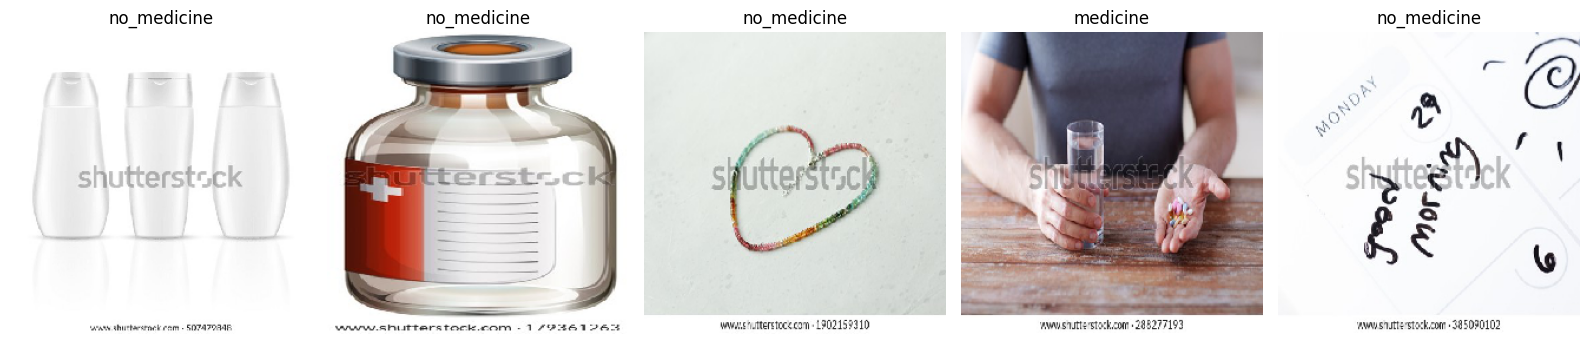

Found 700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)



target_size_edit = (input_size,input_size)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['medicine', 'not_medicine'],
                                                    batch_size = Batch_size,
                                                    target_size = target_size_edit,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              classes=['medicine', 'not_medicine'],
                                                              batch_size = Batch_size,
                                                              target_size = target_size_edit,
                                                              class_mode = 'categorical')
#####################################
class_labels = ["medicine","no_medicine"]
batch = next(train_generator)
images, labels = batch[0], batch[1] # 0번 이미지데이터 1번 레이블
print(labels[:10])
plt.figure(figsize=(16,8))
for i in range(5) :
    ax = plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.title(class_labels[sum(np.where(labels[i] == 1))[0]])
    plt.axis("off")
plt.tight_layout()
plt.show()
#########################################
train_datagen = ImageDataGenerator()
validation_datagen=ImageDataGenerator()
target_size_edit = (input_size,input_size)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['medicine', 'not_medicine'],
                                                    batch_size = Batch_size,
                                                    target_size = target_size_edit,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              classes=['medicine', 'not_medicine'],
                                                              batch_size = Batch_size,
                                                              target_size = target_size_edit,
                                                              class_mode = 'categorical')


In [ ]:
validation_generator.class_indices

{'medicine': 0, 'not_medicine': 1}

In [ ]:
## 이 아래 코드를 사용하려면 rescale=1/255, 부분을 주석처리 해야함(efficient는 자동으로 해줌)
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers
def build_model_Efficient(NUM_CLASSES):
    inputs = layers.Input(shape=(input_size, input_size, 3))
    # x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["acc"]
    )
    return model

model = build_model_Efficient(NUM_CLASSES = 2)

In [ ]:
# steps_per_epoch = 훈련 샘플 수 / 배치 사이즈
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=50,
                    validation_steps = len(validation_generator),
                    verbose=1)

Epoch 1/50
35/35 [==============================] - 243s 7s/step - loss: 1.0018 - acc: 0.7457 - val_loss: 1.8018 - val_acc: 0.5667
Epoch 2/50
35/35 [==============================] - 110s 3s/step - loss: 0.5566 - acc: 0.8614 - val_loss: 0.9887 - val_acc: 0.7167
Epoch 3/50
35/35 [==============================] - 115s 3s/step - loss: 0.5183 - acc: 0.8771 - val_loss: 0.8562 - val_acc: 0.7633
Epoch 4/50
35/35 [==============================] - 116s 3s/step - loss: 0.4458 - acc: 0.8914 - val_loss: 0.7741 - val_acc: 0.7833
Epoch 5/50
35/35 [==============================] - 107s 3s/step - loss: 0.4278 - acc: 0.8971 - val_loss: 0.6503 - val_acc: 0.8167
Epoch 6/50
35/35 [==============================] - 117s 3s/step - loss: 0.4903 - acc: 0.9043 - val_loss: 0.7888 - val_acc: 0.8300
Epoch 7/50
35/35 [==============================] - 115s 3s/step - loss: 0.4145 - acc: 0.9029 - val_loss: 1.0686 - val_acc: 0.7933
Epoch 8/50
35/35 [==============================] - 117s 3s/step - loss: 0.4934 - a

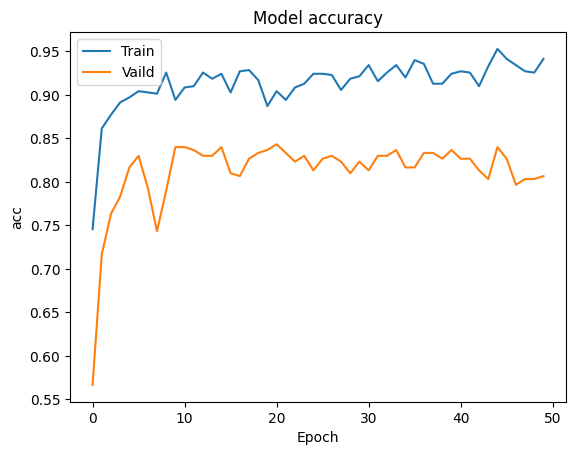

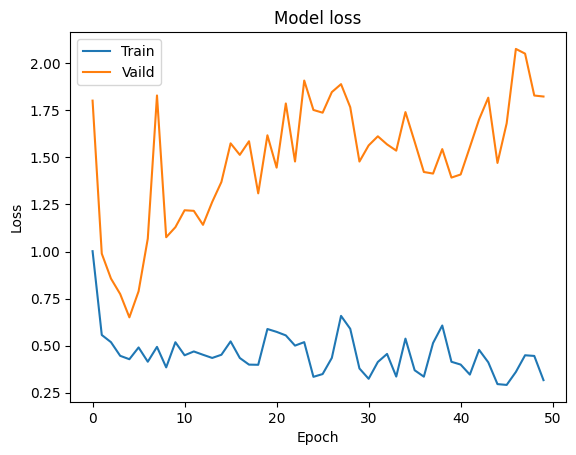

In [ ]:
# 훈련 과정 시각화 (정확도)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Vaild'], loc='upper left')
plt.show()

# 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Vaild'], loc='upper left')
plt.show()

In [ ]:
model.save(f'{save_model}_model.h5')

In [ ]:
from keras.models import load_model
a = load_model(f'{save_model}_model.h5')
test_hist = a.evaluate(validation_generator)

10/10 [==============================] - 9s 115ms/step - loss: 12.8807 - acc: 0.4176


In [ ]:
# full_data
# save_model = "full_data"
# train_dir      = './federated_learning_weather_dataset_full/full/train/'
# validation_dir = './federated_learning_weather_dataset_full/full/validation/'

# day
save_model = "day"
# train_dir      = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/day/train/'
# validation_dir = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/day/validation/'
# fog
# save_model = "fog"
# train_dir      = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/fog/train/'
# validation_dir = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/fog/validation/'
# # night
# save_model = "night"
# train_dir      = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/night/train/'
# validation_dir = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/night/validation/'
# # # rain
# save_model = "rain"
# train_dir      = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/rain/train/'
# validation_dir = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/rain/validation/'
# # sand
# save_model = "sand"
# train_dir      = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/sand/train/'
# validation_dir = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/sand/validation/'
# # snow
# save_model = "snow"
train_dir      = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/snow/train/'
validation_dir = './federated_learning_weather_dataset/data_bg_or_animal_crop_weather/snow/validation/'

Found 335 images belonging to 5 classes.
Found 182 images belonging to 5 classes.
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


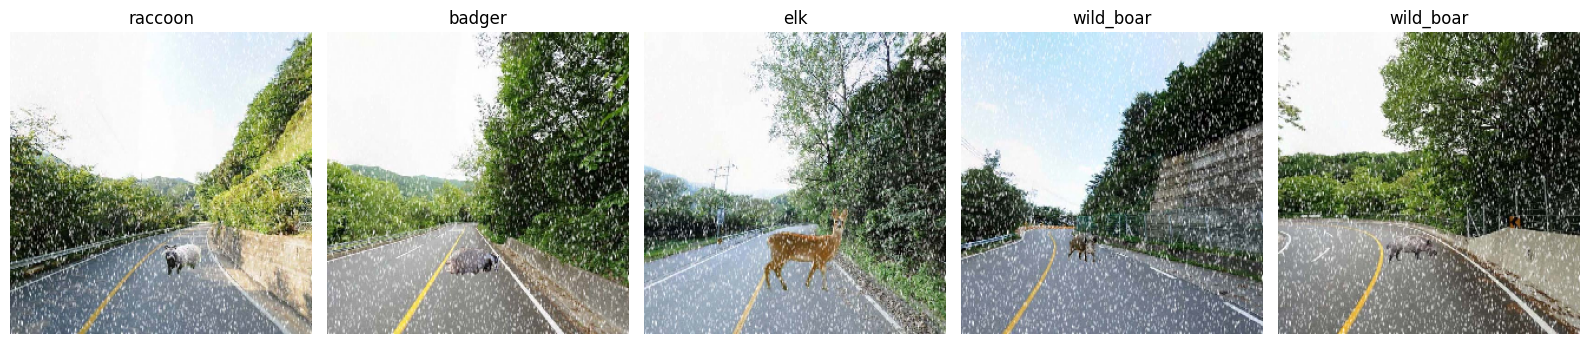

Found 335 images belonging to 5 classes.
Found 182 images belonging to 5 classes.
10/10 [==============================] - 2s 63ms/step - loss: 5.8266 - acc: 0.6264


In [ ]:
# 사이즈
input_size = 256
#배치 사이즈
Batch_size =20
################################################################################################################################################
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)



target_size_edit = (input_size,input_size)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['고라니', '너구리',"멧돼지","오소리","배경"],
                                                    batch_size = Batch_size,
                                                    target_size = target_size_edit,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              classes=['고라니', '너구리',"멧돼지","오소리","배경"],
                                                              batch_size = Batch_size,
                                                              target_size = target_size_edit,
                                                              class_mode = 'categorical')
#####################################
class_labels = ['elk', 'raccoon',"wild_boar","badger","background"]
batch = next(train_generator)
images, labels = batch[0], batch[1] # 0번 이미지데이터 1번 레이블
print(labels[:10])
plt.figure(figsize=(16,8))
for i in range(5) :
    ax = plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.title(class_labels[sum(np.where(labels[i] == 1))[0]])
    plt.axis("off")
plt.tight_layout()
plt.show()
#########################################
train_datagen = ImageDataGenerator()
validation_datagen=ImageDataGenerator()
target_size_edit = (input_size,input_size)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['고라니', '너구리',"멧돼지","오소리","배경"],
                                                    batch_size = Batch_size,
                                                    target_size = target_size_edit,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              classes=['고라니', '너구리',"멧돼지","오소리","배경"],
                                                              batch_size = Batch_size,
                                                              target_size = target_size_edit,
                                                              class_mode = 'categorical')



In [ ]:
from keras.models import load_model
a = load_model(f'{save_model}_model.h5')
test_hist = a.evaluate(validation_generator)

TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.